**Практическое  задание № 4 Анализ профилей подписчиков сообществ**

Цель работы: 
освоить методику и инструменты анализа данных социальных сетей для задачи исследования профилей пользователей сообществ.


Файл данных: data.csv

Формат данных:

Id - идентификатор пользователя социальной сети

first_name - имя пользователя

last_name - фамилия пользователя

can_access_closed - индикатор возможности закрытия профиля

is_closed - индикатор закрытия профиля

Sex - пол пользователя

bdate - дата рождения

city_title - город

country_title - страна

universities_name - университет

Deactivated - cтатус пользователя

In [22]:
#импортируем библиотеки для работы с наборами данных (pandas, numpy)
import os
import sys
import pandas as pd
import numpy as np

#импортируем библиотеки для визуализации

from matplotlib import pyplot as plt
#для корректного отображения графиков в среде Jupiter Notebook
%matplotlib inline


**ЗАГРУЗКА ДАННЫХ**

In [23]:
# Загрузка набора данных с использованием инструмента Google Colab, для использования кода ниже уберите знак комментария(#)
# from google.colab import files
# uploaded = files.upload()

In [24]:
# Загружаем имя файла с данными в переменную `file`
file = 'Profili.csv'
data = pd.read_csv(file)

# file = 'Profili_podpischikov_Onlayn_SevGU.xlsx'
# Чтение набора данных из файла Excel
# data = pd.read_excel(file)
 

In [25]:
data.head(10)
#Смотрим на первые 10 записей в датасете

id ﻿first_name  last_name can_access_closed is_closed  sex  \
0    45248    Viktoria  Posledova              True     False    1   
1   252096       Denis   Nacharov              True     False    2   
2   324686      Viktor    Gutikov             False      True    2   
3   348638      Sergey  Deorditsa              True     False    2   
4   417529      Dmitry    Voronin              True     False    2   
5   595055       Anton   Napalkov              True     False    2   
6   624520      Andrey    Mosunov              True     False    2   
7   723581        Ivan      Kusov              True     False    2   
8   918637      Sergey  Kuznetsov             False      True    2   
9  1047791    Vsevolod    Pelipas              True     False    2   

        bdate  city_id        city_title  country_id  ... universities_city  \
0       29.11      2.0  Saint Petersburg         1.0  ...               NaN   
1    5.9.1990    185.0        Sevastopol         1.0  ...               NaN   
2        11.4    185.0        Sevastopol         1.0  ...               NaN   
3   22.5.1975    185.0        Sevastopol         1.0  ...               185   
4       24.10    185.0        Sevastopol         1.0  ...               NaN   
5   23.3.1987    185.0        Sevastopol         1.0  ...               185   
6    7.5.1986    185.0        Sevastopol         1.0  ...               NaN   
7         NaN    185.0        Sevastopol         1.0  ...               NaN   
8        30.7    458.0            Berlin        65.0  ...               NaN   
9  31.10.1980    185.0        Sevastopol         1.0  ...               NaN   

   universities_country universities_education_form  \
0                   NaN                         NaN   
1                   NaN                         NaN   
2                   NaN                         NaN   
3                     1                   Full-time   
4                   NaN                         NaN   
5                     1                   Full-time   
6                   NaN                         NaN   
7                   NaN                         NaN   
8                   NaN                         NaN   
9                   NaN                         NaN   

  universities_education_status universities_faculty  \
0                           NaN                  NaN   
1                           NaN                  NaN   
2                           NaN                  NaN   
3          Alumnus (Specialist)                53239   
4                           NaN                  NaN   
5          Alumnus (Specialist)                33626   
6                           NaN                  NaN   
7                           NaN                  NaN   
8                           NaN                  NaN   
9                           NaN                  NaN   

                           universities_faculty_name universities_graduation  \
0                                                NaN                     NaN   
1                                                NaN                     NaN   
2                                                NaN                     NaN   
3  Институт радиоэлектроники и информационной без...                    1997   
4                                                NaN                     NaN   
5                Факультет экономической информатики                    2009   
6                                                NaN                     NaN   
7                                                NaN                     NaN   
8                                                NaN                     NaN   
9                                                NaN                     NaN   

  universities_id         universities_name deactivated  
0             NaN                       NaN         NaN  
1             NaN                       NaN         NaN  
2             NaN                       NaN         NaN  
3            1032  СевНТУ (бывш

In [26]:
print(data.columns)
#получаем список столбцов

Index(['id', '﻿first_name', 'last_name', 'can_access_closed', 'is_closed',
       'sex', 'bdate', 'city_id', 'city_title', 'country_id', 'country_title',
       'group', 'home_town', 'universities_chair', 'universities_chair_name',
       'universities_city', 'universities_country',
       'universities_education_form', 'universities_education_status',
       'universities_faculty', 'universities_faculty_name',
       'universities_graduation', 'universities_id', 'universities_name',
       'deactivated'],
      dtype='object')


In [27]:
data.shape
#Размерность датасета - 

(3509, 25)

**ПОДГОТОВКА ДАННЫХ**

In [28]:
#Выбираем столбцы для анализа, столбец '﻿first_name' - ключевое поле 
columns_to_use = ['id', '﻿first_name','last_name','bdate','sex', 'city_title','country_title','deactivated']

In [29]:
#Сокращаем количество столбцов в новом наборе данных
data1 = data [columns_to_use]


In [30]:
data1


id ﻿first_name   last_name      bdate  sex        city_title  \
0         45248    Viktoria   Posledova      29.11    1  Saint Petersburg   
1        252096       Denis    Nacharov   5.9.1990    2        Sevastopol   
2        324686      Viktor     Gutikov       11.4    2        Sevastopol   
3        348638      Sergey   Deorditsa  22.5.1975    2        Sevastopol   
4        417529      Dmitry     Voronin      24.10    2        Sevastopol   
...         ...         ...         ...        ...  ...               ...   
3504  655814588      Tvoya'      Lyubov        NaN    1               NaN   
3505  658500894        Anna       Felsh        NaN    1               NaN   
3506  663068103   Alexander  Kondrashov  10.9.2003    2               NaN   
3507  667452099       Forum       Armia       27.8    2        Sevastopol   
3508  673736280   Ekaterina   Kolbeneva        NaN    1               NaN   

     country_title deactivated  
0           Russia         NaN  
1           Russia         NaN  
2           Russia         NaN  
3           Russia         NaN  
4           Russia         NaN  
...            ...         ...  
3504           NaN      banned  
3505           NaN      banned  
3506           NaN         NaN  
3507        Russia         NaN  
3508           NaN      banned  

[3509 rows x 8 columns]

In [31]:
#Количество записей в исходных данных (длина набора данных)
lenth_before = len(data)
lenth_before

3509

In [32]:
# Удаление забаненных и удаленных пользователей 
data1 = data1.drop(data1[data1['deactivated'] =='banned'].index)
data1 = data1.drop(data1[data1['deactivated'] =='deleted'].index)

In [33]:
# Размерность датасета после удаления
data1.shape

(3460, 8)

In [34]:
# Разбиение поля даты рождения на день, месяц и год.
# Формируем новые столбцы из столбца 'bdate', разделитель - точка '.'.
# Новые столбцы дописываются к набору данных, NaN - значение не указано 

data1['bday']=data1['bdate'].str.split('.').str.get(0)
data1['bmonth']=data1['bdate'].str.split('.').str.get(1)
data1['byear']=data1['bdate'].str.split('.').str.get(2)
data1.head(10)

id ﻿first_name  last_name       bdate  sex        city_title  \
0    45248    Viktoria  Posledova       29.11    1  Saint Petersburg   
1   252096       Denis   Nacharov    5.9.1990    2        Sevastopol   
2   324686      Viktor    Gutikov        11.4    2        Sevastopol   
3   348638      Sergey  Deorditsa   22.5.1975    2        Sevastopol   
4   417529      Dmitry    Voronin       24.10    2        Sevastopol   
5   595055       Anton   Napalkov   23.3.1987    2        Sevastopol   
6   624520      Andrey    Mosunov    7.5.1986    2        Sevastopol   
7   723581        Ivan      Kusov         NaN    2        Sevastopol   
8   918637      Sergey  Kuznetsov        30.7    2            Berlin   
9  1047791    Vsevolod    Pelipas  31.10.1980    2        Sevastopol   

  country_title deactivated bday bmonth byear  
0        Russia         NaN   29     11   NaN  
1        Russia         NaN    5      9  1990  
2        Russia         NaN   11      4   NaN  
3        Russia         NaN   22      5  1975  
4        Russia         NaN   24     10   NaN  
5        Russia         NaN   23      3  1987  
6        Russia         NaN    7      5  1986  
7        Russia         NaN  NaN    NaN   NaN  
8       Germany         NaN   30      7   NaN  
9        Russia         NaN   31     10  1980

In [35]:
#Удаление записей, которые не содержат информацию о годе рождения 
data1 = data1[data1['byear'].notnull()]
data1.head(10)

id ﻿first_name      last_name       bdate  sex  city_title  \
1    252096       Denis       Nacharov    5.9.1990    2  Sevastopol   
3    348638      Sergey      Deorditsa   22.5.1975    2  Sevastopol   
5    595055       Anton       Napalkov   23.3.1987    2  Sevastopol   
6    624520      Andrey        Mosunov    7.5.1986    2  Sevastopol   
9   1047791    Vsevolod        Pelipas  31.10.1980    2  Sevastopol   
10  1110771      Dmitry        Voronin   18.3.1985    2  Sevastopol   
11  1128387      Alexey        Kabanov    6.8.1985    2  Sevastopol   
16  1451337      Anyuta  Kolodyazhnaya  30.11.1988    1  Sevastopol   
17  1548404   Stanislav     Roschupkin    9.7.1985    2  Sevastopol   
18  1677681        Yury        Velyaev   29.3.1986    2  Sevastopol   

   country_title deactivated bday bmonth byear  
1         Russia         NaN    5      9  1990  
3         Russia         NaN   22      5  1975  
5         Russia         NaN   23      3  1987  
6         Russia         NaN    7      5  1986  
9         Russia         NaN   31     10  1980  
10        Russia         NaN   18      3  1985  
11        Russia         NaN    6      8  1985  
16       Ukraine         NaN   30     11  1988  
17        Russia         NaN    9      7  1985  
18        Russia         NaN   29      3  1986

In [36]:
#Преобразование типов данных полей дня, месяца, года из Object в integer ( из строки в целое число)
data1['bday']=data1['bday'].astype(str).astype(int)
data1['bmonth']=data1['bmonth'].astype(str).astype(int)
data1['byear']=data1['byear'].astype(str).astype(int)

In [37]:
#Просмотр типов полей данных
data1.dtypes

id                int64
﻿first_name      object
last_name        object
bdate            object
sex               int64
city_title       object
country_title    object
deactivated      object
bday              int32
bmonth            int32
byear             int32
dtype: object

In [38]:
#Фильтруем записи по году рождения  (удаляем пользователей с годом рождения > 2004)
data1 = data1.drop(data1[data1['byear'] > 2004].index)
data1.head(10)

id ﻿first_name      last_name       bdate  sex  city_title  \
1    252096       Denis       Nacharov    5.9.1990    2  Sevastopol   
3    348638      Sergey      Deorditsa   22.5.1975    2  Sevastopol   
5    595055       Anton       Napalkov   23.3.1987    2  Sevastopol   
6    624520      Andrey        Mosunov    7.5.1986    2  Sevastopol   
9   1047791    Vsevolod        Pelipas  31.10.1980    2  Sevastopol   
10  1110771      Dmitry        Voronin   18.3.1985    2  Sevastopol   
11  1128387      Alexey        Kabanov    6.8.1985    2  Sevastopol   
16  1451337      Anyuta  Kolodyazhnaya  30.11.1988    1  Sevastopol   
17  1548404   Stanislav     Roschupkin    9.7.1985    2  Sevastopol   
18  1677681        Yury        Velyaev   29.3.1986    2  Sevastopol   

   country_title deactivated  bday  bmonth  byear  
1         Russia         NaN     5       9   1990  
3         Russia         NaN    22       5   1975  
5         Russia         NaN    23       3   1987  
6         Russia         NaN     7       5   1986  
9         Russia         NaN    31      10   1980  
10        Russia         NaN    18       3   1985  
11        Russia         NaN     6       8   1985  
16       Ukraine         NaN    30      11   1988  
17        Russia         NaN     9       7   1985  
18        Russia         NaN    29       3   1986

In [39]:
#Количество записей в исходных данных (длина набора данных)
lenth_after = len(data1)
lenth_after

1328

In [40]:
#Визуализация количества данных до и после фильтрации
plt.bar(("Исходный", "После фильтрации"), (lenth_before,lenth_after));


In [41]:
# Определить из каких городов участники сообщества - подсчитать количество участников по каждому городу
data1['city_title'].value_counts()

Sevastopol           649
Simferopol            51
Yalta                 25
Moscow                21
Feodosia              16
                    ... 
Nikolaevka             1
Krasnogvardeyskoe      1
Cheboxary              1
Nefteyugansk           1
Tiraspol               1
Name: city_title, Length: 111, dtype: int64

<BarContainer object of 10 artists>

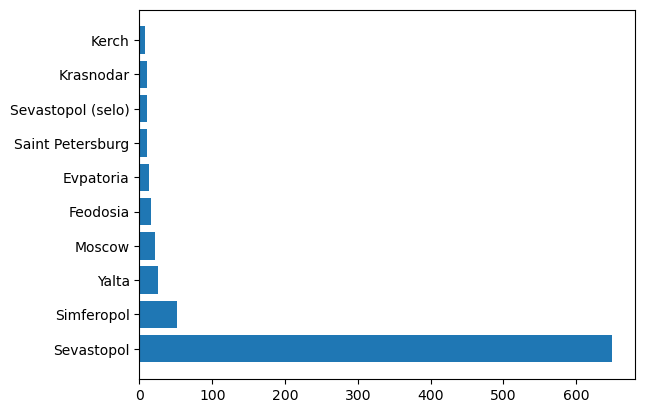

In [42]:
#Визуализируем количество участников из 10 городов с наибольшим числом участников
top_sities = data1['city_title'].value_counts().head(10)
plt.barh(top_sities.keys(), top_sities.values)


In [43]:
# Определить из каких cтран участники сообщества - подсчитать количество участников по каждой стране
data1['country_title'].value_counts()

Russia            1026
Ukraine             51
USA                  9
Kazakhstan           3
Germany              3
Uzbekistan           3
Japan                2
Moldova              2
United Kingdom       2
Cuba                 1
Latvia               1
Armenia              1
Jamaica              1
Kyrgyzstan           1
Norway               1
Albania              1
Portugal             1
Switzerland          1
Netherlands          1
Angola               1
Uganda               1
Belarus              1
Afghanistan          1
Name: country_title, dtype: int64

<BarContainer object of 5 artists>

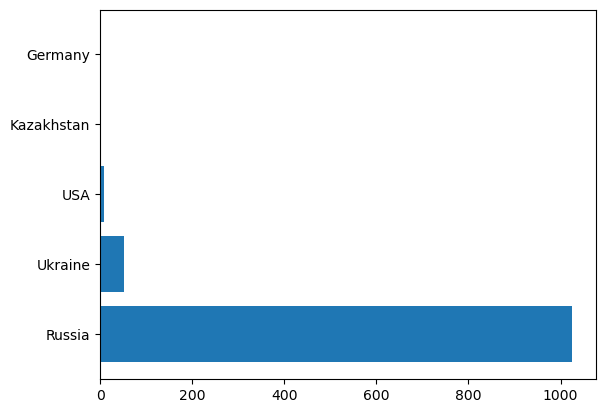

In [44]:
#Визуализируем количество участников из 5 стран с наибольшим числом участников
top_sities = data1['country_title'].value_counts().head(5)
plt.barh(top_sities.keys(), top_sities.values)

In [45]:
# Экспорт отфильтрованных данных в CSV-файл
data1.to_csv('data_post.csv',index=False, encoding='utf-8') 